In [2]:
from neuron import h
from neuron.units import ms, mV, µm
h.load_file('stdrun.hoc')
import matplotlib.pyplot as plt

In [3]:
# define myelinate neuron unit(BallAndStick model）
class Myelinatedaxon:
    def __init__(self, gid):
        self._gid = gid  #  neuron ID
        self.axon = h.Section("axon", self)  # create soma
        self.axon.L = 20000 * μm  # identify data
        self.axon.diam = 8 * μm  # diameter
        self.axon.nseg = 43  # nsg
        self.axon.insert(h.hh)  #  Hodgkin-Huxley 
        self.axon.insert(h.pas)
        self.axon.Ra = 35.4
        self.axon.cm = 1
        for seg in self.axon:
            seg.pas.e = -65 * mV
         # record membrane potential
        self.v = h.Vector().record(self.axon(0.1)._ref_v)
      
    def __repr__(self):
        return f"NeuronModel[{self._gid}]"


In [4]:
# define myelinate neuron unit(BallAndStick model）
class unMyelinatedaxon:
    def __init__(self, gid):
        self._gid = gid  #  neuron ID
        self.axon = h.Section("axon", self)  # create soma
        self.axon.L = 20000 * μm  # identify data
        self.axon.diam = 3 * μm  # diameter
        self.axon.nseg = 43  # nsg
        self.axon.insert(h.hh)  #  Hodgkin-Huxley 
        self.axon.insert(h.pas)
        self.axon.Ra = 35.4
        self.axon.cm = 1
        for seg in self.axon:
            seg.pas.e = -65 * mV
         # record membrane potential
        self.v = h.Vector().record(self.axon(0.1)._ref_v)
      
    def __repr__(self):
        return f"NeuronModel[{self._gid}]"


In [5]:
myelaxons = [Myelinatedaxon(i) for i in range(5)]
unmyelaxons = [unMyelinatedaxon(i) for i in range(10)]

In [6]:
h.topology()


|-------------------------------------------|       NeuronModel[0].axon(0-1)
|-------------------------------------------|       NeuronModel[1].axon(0-1)
|-------------------------------------------|       NeuronModel[2].axon(0-1)
|-------------------------------------------|       NeuronModel[3].axon(0-1)
|-------------------------------------------|       NeuronModel[4].axon(0-1)
|-------------------------------------------|       NeuronModel[0].axon(0-1)
|-------------------------------------------|       NeuronModel[1].axon(0-1)
|-------------------------------------------|       NeuronModel[2].axon(0-1)
|-------------------------------------------|       NeuronModel[3].axon(0-1)
|-------------------------------------------|       NeuronModel[4].axon(0-1)
|-------------------------------------------|       NeuronModel[5].axon(0-1)
|-------------------------------------------|       NeuronModel[6].axon(0-1)
|-------------------------------------------|       NeuronModel[7].axon(0-1

1.0

In [7]:
print(myelaxons[0])
h.IClamp(myelaxons[0].axon(0.1))

NeuronModel[0]


IClamp[0]

In [8]:
ics = [h.IClamp(cell.axon(0.1)) for cell in myelaxons + unmyelaxons]
for iclamp in ics:
    iclamp.delay = 10 * ms
    iclamp.dur = 1 * ms
    iclamp.amp = 100

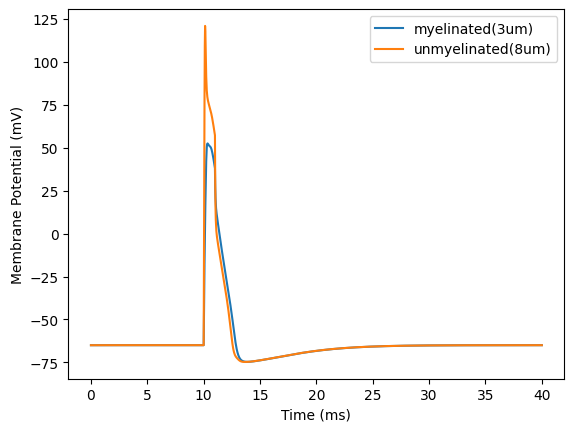

In [9]:
# record simulation time
t = h.Vector().record(h._ref_t)

# start simulation
h.finitialize(-65)  # initial membrance
h.continuerun(40)  # run 100 ms

plt.plot(t, myelaxons[0].v, label='myelinated(3um)')
plt.plot(t, unmyelaxons[0].v, label='unmyelinated(8um)')
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.show()